In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm

In [2]:
np.random.seed(42)
N = 100
X = np.random.rand(N, 2) - 0.5
XX = np.random.randn(2*N, 2)
XX = XX[np.linalg.norm(XX, 1, axis=1) > 1, :]

y = np.concatenate((np.ones(X.shape[0]), -np.ones(XX.shape[0])))
X = np.concatenate((X, XX), axis=0)

In [3]:
def make_meshgrid(x, y, h=.2):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = plt.contourf(xx, yy, Z, **params)
    Z = np.array([clf.predict(x.reshape(1, -1))[0] for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    return plt.contourf(xx, yy, Z, **params)

(-1.5, 1.5)

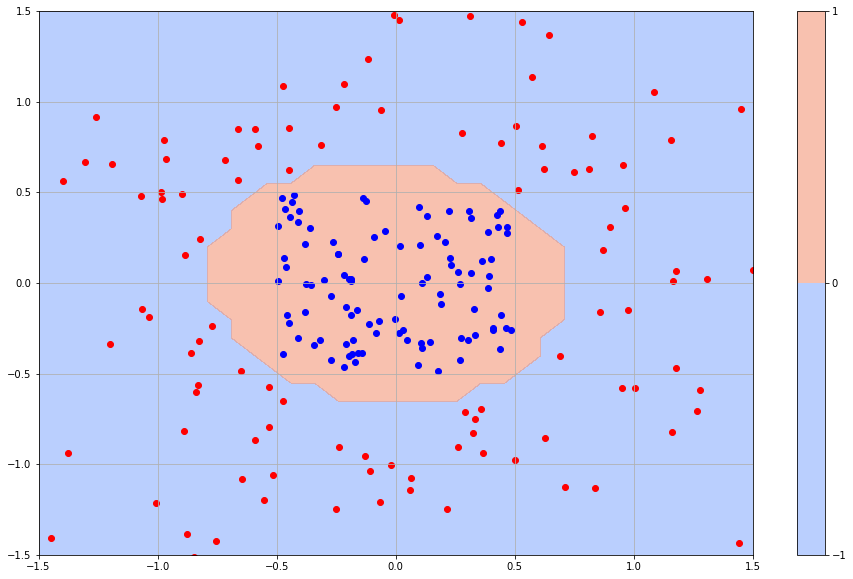

In [4]:
clf = sklearn.svm.SVC(C=1000)
clf.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1, 0.1)

plt.figure(figsize=(16,10))
plot_contours(clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6, levels=[-1, 0, 1])
plt.colorbar()

plt.scatter(X[y == -1,0], X[y == -1,1], color='r', alpha=1)
plt.scatter(X[y == 1,0], X[y == 1,1], color='b', alpha=1)
plt.grid(True)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

(-1.5, 1.5)

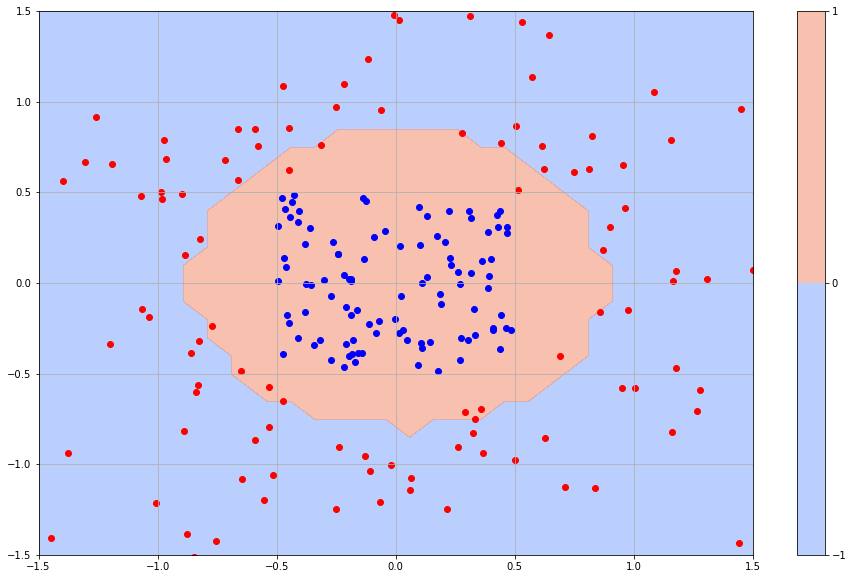

In [5]:
clf = sklearn.svm.SVC(C=0.1)
clf.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1, 0.1)

plt.figure(figsize=(16,10))
plot_contours(clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6, levels=[-1, 0, 1])
plt.colorbar()

plt.scatter(X[y == -1,0], X[y == -1,1], color='r', alpha=1)
plt.scatter(X[y == 1,0], X[y == 1,1], color='b', alpha=1)
plt.grid(True)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])